# Practica

You will analyze a dataset of the global average sea level change since 1880. You will use the data to predict the sea level change through year 2050.

Use the data to complete the following tasks:

1) Use Pandas to import the data from epa-sea-level.csv.

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [35]:
data = pd.read_csv("epa-sea-level.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      134 non-null    int64  
 1   CSIRO Adjusted Sea Level  134 non-null    float64
 2   Lower Error Bound         134 non-null    float64
 3   Upper Error Bound         134 non-null    float64
 4   NOAA Adjusted Sea Level   21 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 5.4 KB


In [36]:
data

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...,...
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058


2) Use `matplotlib` to create a scatter plot using the `Year` column as the x-axis and the `CSIRO Adjusted Sea Level` column as the y-axis.

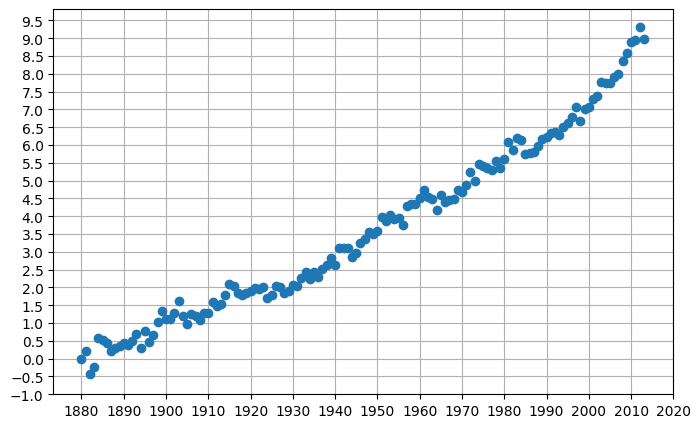

In [19]:
plt.subplots(figsize=(8,5))
plt.scatter(x=data["Year"], y=data["CSIRO Adjusted Sea Level"], zorder=5)
plt.yticks(np.arange(int(data["CSIRO Adjusted Sea Level"].min() - 1), \
                     int(data["CSIRO Adjusted Sea Level"].max() + 1), \
                     0.5))
plt.xticks(np.arange(int(data["Year"].min()), \
                     int(data["Year"].max() + 10), \
                     10))
plt.grid(True, zorder=0)
plt.show()

3) Use the `linregress` function from `scipy.stats` to get the *slope* and *y-intercept* of the line of best fit. Plot the line of best fit over the top of the scatter plot. Make the line go through the year 2050 to predict the sea level rise in 2050.

In [26]:
# Obtengo la recta que mejor se adecúa a los datos mediante esta funcion que aplica regresion lineal
resul = stats.linregress(x=data["Year"], y=data["CSIRO Adjusted Sea Level"])

In [27]:
resul.slope, resul.intercept # slope = pendiente de la recta, intercept = ordenada al origne de la recta

(0.06304458401213482, -119.06594196773983)

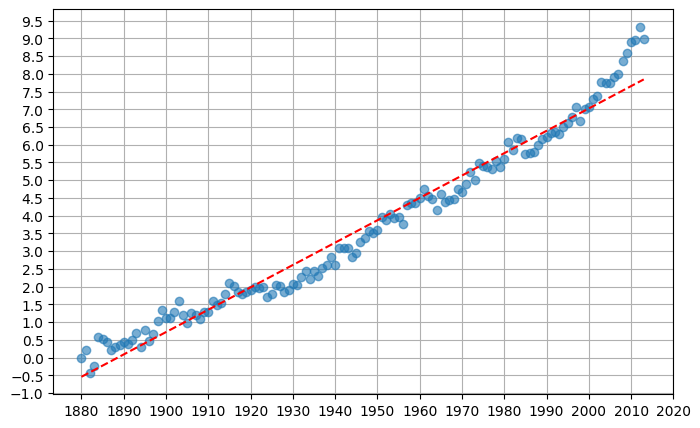

In [33]:
# Formula de la recta: y = x * slope + intercept
slope = resul.slope
intercept = resul.intercept
line_y = data["Year"] * slope + intercept

plt.subplots(figsize=(8,5))
plt.plot(data["Year"], line_y, color="red", linestyle="dashed", zorder=5)
plt.scatter(x=data["Year"], y=data["CSIRO Adjusted Sea Level"], alpha=0.6, zorder=4)
plt.yticks(np.arange(int(data["CSIRO Adjusted Sea Level"].min() - 1), \
                     int(data["CSIRO Adjusted Sea Level"].max() + 1), \
                     0.5))
plt.xticks(np.arange(int(data["Year"].min()), \
                     int(data["Year"].max() + 10), \
                     10))
plt.grid(True, zorder=0)
plt.show()

4) Plot a new line of best fit just using the data from year 2000 through the most recent year in the dataset. Make the line also go through the year 2050 to predict the sea level rise in 2050 if the rate of rise continues as it has since the year 2000.

In [51]:
recent_years = data[data["Year"] >= 2000]
recent_years

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
120,2000,7.062992,6.791339,7.334646,6.920582
121,2001,7.287402,7.019685,7.555118,7.087460
122,2002,7.381890,7.110236,7.653543,7.319698
123,2003,7.759843,7.484252,8.035433,7.488353
124,2004,7.740157,7.464567,8.015748,7.507933
125,2005,7.744094,7.472441,8.015748,7.644563
126,2006,7.917323,7.645669,8.188976,7.697420
127,2007,7.996063,7.712598,8.279528,7.702147
128,2008,8.350394,8.078740,8.622047,7.907365
129,2009,8.586614,8.311024,8.862205,8.046354


In [52]:
resul_recent_years = stats.linregress(x=recent_years["Year"], y=recent_years["CSIRO Adjusted Sea Level"])
slope_recent_years = resul_recent_years.slope
intercept_recent_years = resul_recent_years.intercept

In [53]:
array = np.arange(recent_years["Year"].min()+1, 2051, 1)
recent_years_and_beyond = np.concatenate((recent_years["Year"].to_numpy(), array))
recent_years_and_beyond

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
       2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030,
       2031, 2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041,
       2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049, 2050])

In [54]:
line_y_recent_years_and_beyond = recent_years_and_beyond * slope_recent_years + intercept_recent_years
line_y_recent_years_and_beyond

array([ 7.06107986,  7.22750713,  7.3939344 ,  7.56036168,  7.72678895,
        7.89321622,  8.0596435 ,  8.22607077,  8.39249804,  8.55892532,
        8.72535259,  8.89177986,  9.05820714,  9.22463441,  7.22750713,
        7.3939344 ,  7.56036168,  7.72678895,  7.89321622,  8.0596435 ,
        8.22607077,  8.39249804,  8.55892532,  8.72535259,  8.89177986,
        9.05820714,  9.22463441,  9.39106168,  9.55748896,  9.72391623,
        9.8903435 , 10.05677078, 10.22319805, 10.38962532, 10.5560526 ,
       10.72247987, 10.88890714, 11.05533442, 11.22176169, 11.38818896,
       11.55461624, 11.72104351, 11.88747078, 12.05389806, 12.22032533,
       12.3867526 , 12.55317988, 12.71960715, 12.88603442, 13.0524617 ,
       13.21888897, 13.38531624, 13.55174352, 13.71817079, 13.88459806,
       14.05102534, 14.21745261, 14.38387988, 14.55030716, 14.71673443,
       14.8831617 , 15.04958898, 15.21601625, 15.38244352])

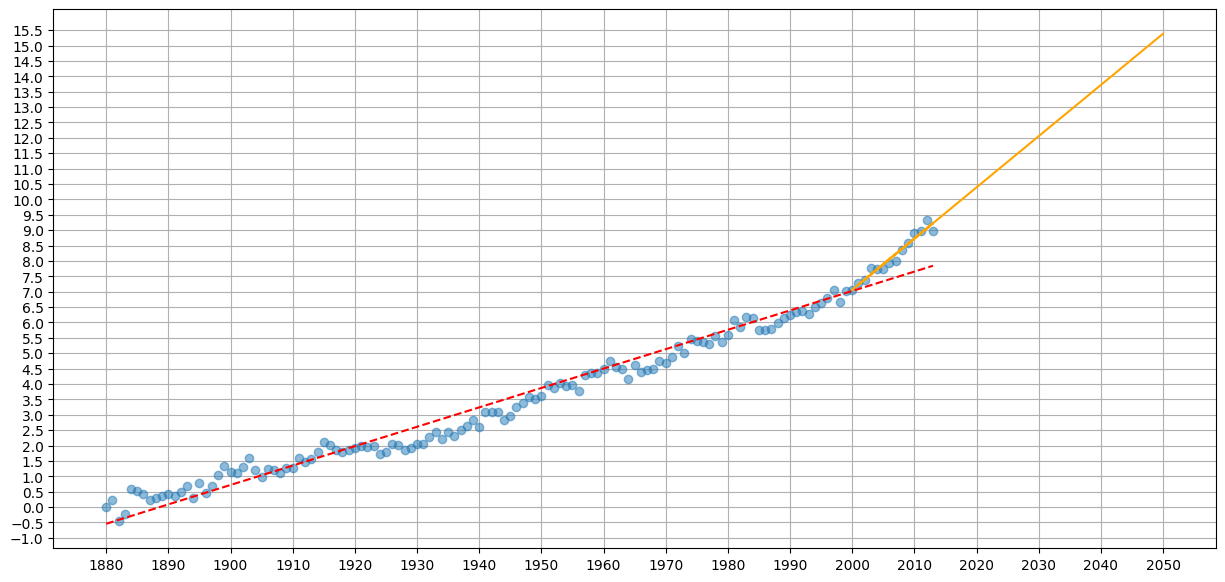

In [56]:
plt.subplots(figsize=(15,7))
plt.scatter(x=data["Year"], y=data["CSIRO Adjusted Sea Level"], alpha=0.5, zorder=3)
plt.plot(data["Year"], line_y, color="red", linestyle="dashed", zorder=4)
plt.plot(recent_years_and_beyond, line_y_recent_years_and_beyond, color="orange", zorder=5)
plt.yticks(np.arange(int(data["CSIRO Adjusted Sea Level"].min() - 1), \
                     int(line_y_recent_years_and_beyond.max() + 1), \
                     0.5))
plt.xticks(np.arange(int(data["Year"].min()), \
                     recent_years_and_beyond.max() + 1, \
                     10))
plt.grid(True, zorder=0)
plt.show()

5) The x label should be `Year`, the y label should be `Sea Level (inches)`, and the title should be `Rise in Sea Level`.

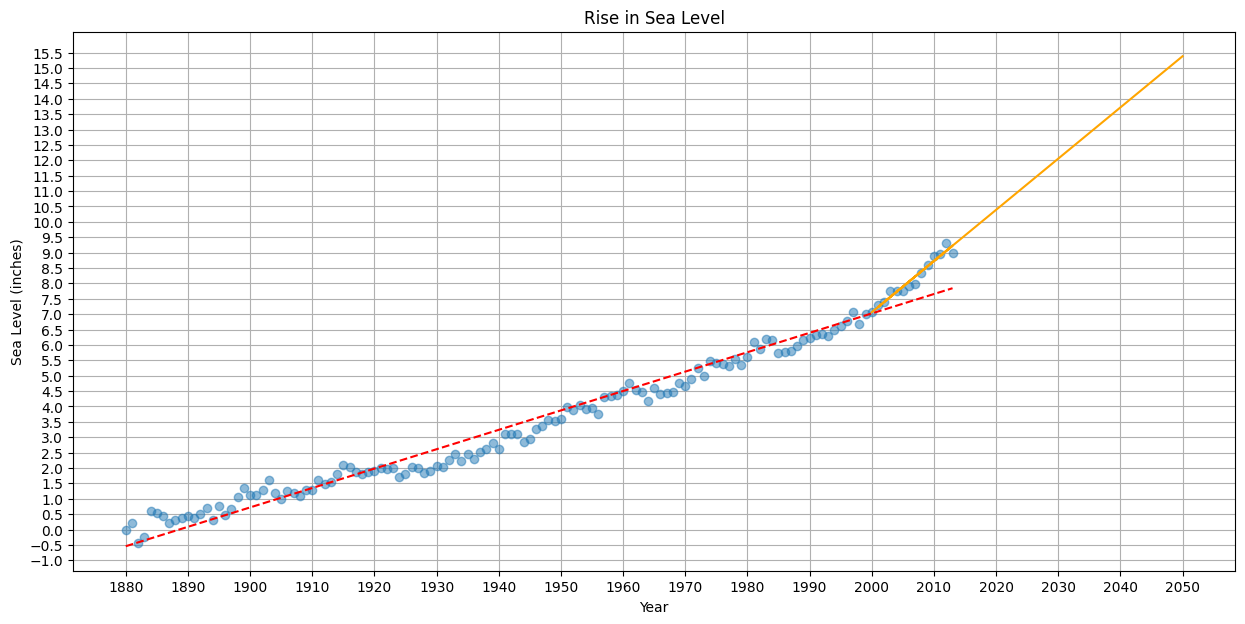

In [57]:
plt.subplots(figsize=(15,7))
plt.scatter(x=data["Year"], y=data["CSIRO Adjusted Sea Level"], alpha=0.5, zorder=3)
plt.plot(data["Year"], line_y, color="red", linestyle="dashed", zorder=4)
plt.plot(recent_years_and_beyond, line_y_recent_years_and_beyond, color="orange", zorder=5)
plt.yticks(np.arange(int(data["CSIRO Adjusted Sea Level"].min() - 1), \
                     int(line_y_recent_years_and_beyond.max() + 1), \
                     0.5))
plt.xticks(np.arange(int(data["Year"].min()), \
                     recent_years_and_beyond.max() + 1, \
                     10))
plt.xlabel("Year")
plt.ylabel("Sea Level (inches)")
plt.title("Rise in Sea Level")
plt.grid(True, zorder=0)
plt.show()